1.	Import the libraries
2.	Import the dataset
3.	Plot the data points
4.	Split the data into dependent and independent variables
5.	Fit the model
6.	Find the clusters for each data point
7.	Compute coordinates of the centroid of each cluster
8.	Plot the final graph with clusters and new point to be classified
9.	Perform the prediction/classification on the test data point

In [1]:
#Import required libraries and packages
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read the dataset
df = pd.read_csv("19BCE2072_datapoints.csv")
df

,var1,var2,classVar
0,1.713,1.586,0
1,0.180,1.786,1
2,0.353,1.240,1
3,0.940,1.566,0
4,1.486,0.759,1
5,1.266,1.106,0
6,1.540,0.419,1
7,0.459,1.799,1
8,0.773,0.186,1


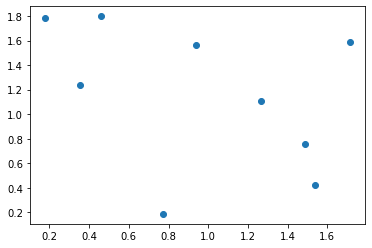

In [3]:
#Plot the points
plt.scatter(df['var1'],df['var2'])
plt.show()

In [4]:
#Split the data into dependent and independent variables
x = df.iloc[:,0:2] 
y= df.iloc[:-1]

In [5]:
#Initialize and fit the K-Means Clustering Model
kmeans = KMeans(3, random_state=10)
kmeans.fit(x, y)

KMeans(n_clusters=3, random_state=10)

In [6]:
#Find out the clusters for each data point
clusters = kmeans.fit_predict(x)
updatedData = df.copy()
updatedData['cluster'] = clusters 

In [7]:
print(updatedData)

    var1   var2  classVar  cluster
0  1.713  1.586         0        2
1  0.180  1.786         1        0
2  0.353  1.240         1        0
3  0.940  1.566         0        2
4  1.486  0.759         1        1
5  1.266  1.106         0        2
6  1.540  0.419         1        1
7  0.459  1.799         1        0
8  0.773  0.186         1        1


In [8]:
#Compute coordinates of the centroid of each cluster
print("CENTROIDS")
centroids = updatedData.groupby('cluster')['var1', 'var2'].mean()
print(centroids)

CENTROIDS
             var1      var2
cluster                    
0        0.330667  1.608333
1        1.266333  0.454667
2        1.306333  1.419333


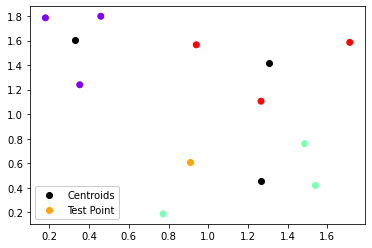

In [9]:
#Plot the final graph with clusters and new point to be classified
plt.scatter(centroids['var1'], centroids['var2'], color='black', label='Centroids')
plt.scatter(updatedData['var1'],updatedData['var2'],c=updatedData['cluster'],cmap='rainbow')
plt.scatter(0.906, 0.606, color='orange', label='Test Point')
plt.legend(framealpha=1, frameon=True);

In [10]:
#Perform the prediction/classfication on test data point
result = kmeans.predict(np.array([0.906, 0.606]).reshape(1,-1))
print("Data point (0.906, 0.606) belongs to predicted class", result[0])

Data point (0.906, 0.606) belongs to predicted class 1
